In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ahu18 = pd.read_csv('AHU_18.csv',low_memory=False)
ahu18 = ahu18.ffill()
ahu18.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16
0,31-12-2015,00:00:00,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
1,31-12-2015,00:02:42,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
2,31-12-2015,00:03:20,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
3,31-12-2015,00:03:36,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
4,31-12-2015,00:04:05,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63


In [4]:
ahu18.rename(columns={'Column1':'Date','Column2':'Time','Column3':'Supply fan ON?OFF','Column5':'Cold Deck temperature',
                      'Column6':'exhaust fans ON?OFF','Column7':'Hot Deck temperature','Column8':'Mixed Air damper %open',
                      'Column9':'Mixed air temperature','Column10':'Pre-heat coil discharger temperature','Column11':'Pre-heat coil discharger valve',
                      'Column12':'Return air temperature','Column13':'Return air valve','Column4':'Cooling coil valve %open',
                      'Column14':'supply static pressure','Column15':'Supply fan VFD speed', 'Column16':'Return fan VFD speed'},inplace = True)
ahu18.head()

,Date,Time,Supply fan ON?OFF,Cooling coil valve %open,Cold Deck temperature,exhaust fans ON?OFF,Hot Deck temperature,Mixed Air damper %open,Mixed air temperature,Pre-heat coil discharger temperature,Pre-heat coil discharger valve,Return air temperature,Return air valve,supply static pressure,Supply fan VFD speed,Return fan VFD speed
0,31-12-2015,00:00:00,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
1,31-12-2015,00:02:42,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
2,31-12-2015,00:03:20,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
3,31-12-2015,00:03:36,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
4,31-12-2015,00:04:05,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63


In [5]:
ahu18['Return air temperature'] = pd.to_numeric(ahu18['Return air temperature'],errors='coerce')
ahu18['Pre-heat coil discharger temperature'] = pd.to_numeric(ahu18['Pre-heat coil discharger temperature'],errors='coerce')
ahu18['Mixed Air damper %open'] = pd.to_numeric(ahu18['Mixed Air damper %open'],errors='coerce')
ahu18['Cooling coil valve %open'] = pd.to_numeric(ahu18['Cooling coil valve %open'],errors='coerce')
ahu18['Pre-heat coil discharger valve'] = pd.to_numeric(ahu18['Pre-heat coil discharger valve'],errors='coerce')
ahu18['supply static pressure'] = pd.to_numeric(ahu18['supply static pressure'],errors='coerce')
ahu18['Supply fan VFD speed'] = pd.to_numeric(ahu18['Supply fan VFD speed'],errors='coerce')
ahu18['Return fan VFD speed'] = pd.to_numeric(ahu18['Return fan VFD speed'],errors='coerce')
ahu18['Return air valve'] = pd.to_numeric(ahu18['Return air valve'],errors='coerce')
ahu18 = ahu18.ffill()

In [ ]:
ahu['Difference'] = abs(ahu18['Mixed air temperature'] -ahu18['Pre-heat coil discharger temperature'])
ahu['speed'] = ahu18['Return fan VFD speed'] *

In [6]:
sup_on = ahu18[ahu18['Supply fan ON?OFF'].str.contains('ON')]
sup_off = ahu18[ahu18['Supply fan ON?OFF'].str.contains('OFF')]
data_temp = [ahu18['Cold Deck temperature'],ahu18['Hot Deck temperature'],ahu18['Mixed air temperature'],
             ahu18['Pre-heat coil discharger temperature'],
             ahu18['Return air temperature']]
data_temp_1 = [sup_on['Cold Deck temperature'],sup_on['Hot Deck temperature'],sup_on['Mixed air temperature'],
               sup_on['Pre-heat coil discharger temperature'],
               sup_on['Return air temperature']]
data_temp_2 = [sup_off['Cold Deck temperature'],sup_off['Hot Deck temperature'],sup_off['Mixed air temperature'],
               sup_off['Pre-heat coil discharger temperature'],
               sup_off['Return air temperature']]

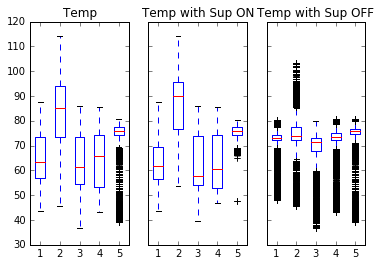

In [7]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_temp)
ax1.set_title('Temp')
ax2.boxplot(data_temp_1)
ax2.set_title('Temp with Sup ON')
ax3.boxplot(data_temp_2)
ax3.set_title('Temp with Sup OFF')
#plt.show()
plt.savefig(''.join(['Temp','_ahu18']))

In [8]:

data_value = [ahu18['Mixed Air damper %open'],ahu18['Pre-heat coil discharger valve'],ahu18['Return air valve'],
              ahu18['Cooling coil valve %open'],ahu18['supply static pressure'],ahu18['Supply fan VFD speed'],
              ahu18['Return fan VFD speed']]
data_value_1 = [sup_on['Mixed Air damper %open'],sup_on['Pre-heat coil discharger valve'],sup_on['Return air valve'],
                sup_on['Cooling coil valve %open'],sup_on['supply static pressure'],sup_on['Supply fan VFD speed'],
                sup_on['Return fan VFD speed']]
data_value_2 = [sup_off['Mixed Air damper %open'],sup_off['Pre-heat coil discharger valve'],sup_off['Return air valve'],
                sup_off['Cooling coil valve %open'],sup_off['supply static pressure'],sup_off['Supply fan VFD speed'],
                sup_off['Return fan VFD speed']]

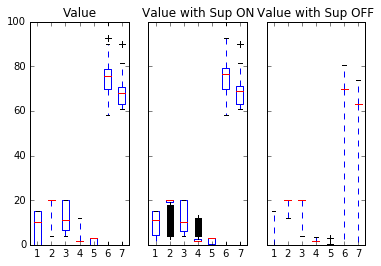

In [10]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_value)
ax1.set_title('Value')
ax2.boxplot(data_value_1)
ax2.set_title('Value with Sup ON')
ax3.boxplot(data_value_2)
ax3.set_title('Value with Sup OFF')
#plt.show()
plt.savefig(''.join(['Value','_ahu18']))

In [12]:
df1 = ahu18.copy()
df1 = df1.drop(['Date','Time','Supply fan ON?OFF','exhaust fans ON?OFF'],1)
ahu18.columns.values

array(['Date', 'Time', 'Supply fan ON?OFF', 'Cooling coil valve %open',
       'Cold Deck temperature', 'exhaust fans ON?OFF',
       'Hot Deck temperature', 'Mixed Air damper %open',
       'Mixed air temperature', 'Pre-heat coil discharger temperature',
       'Pre-heat coil discharger valve', 'Return air temperature',
       'Return air valve', 'supply static pressure',
       'Supply fan VFD speed', 'Return fan VFD speed'], dtype=object)

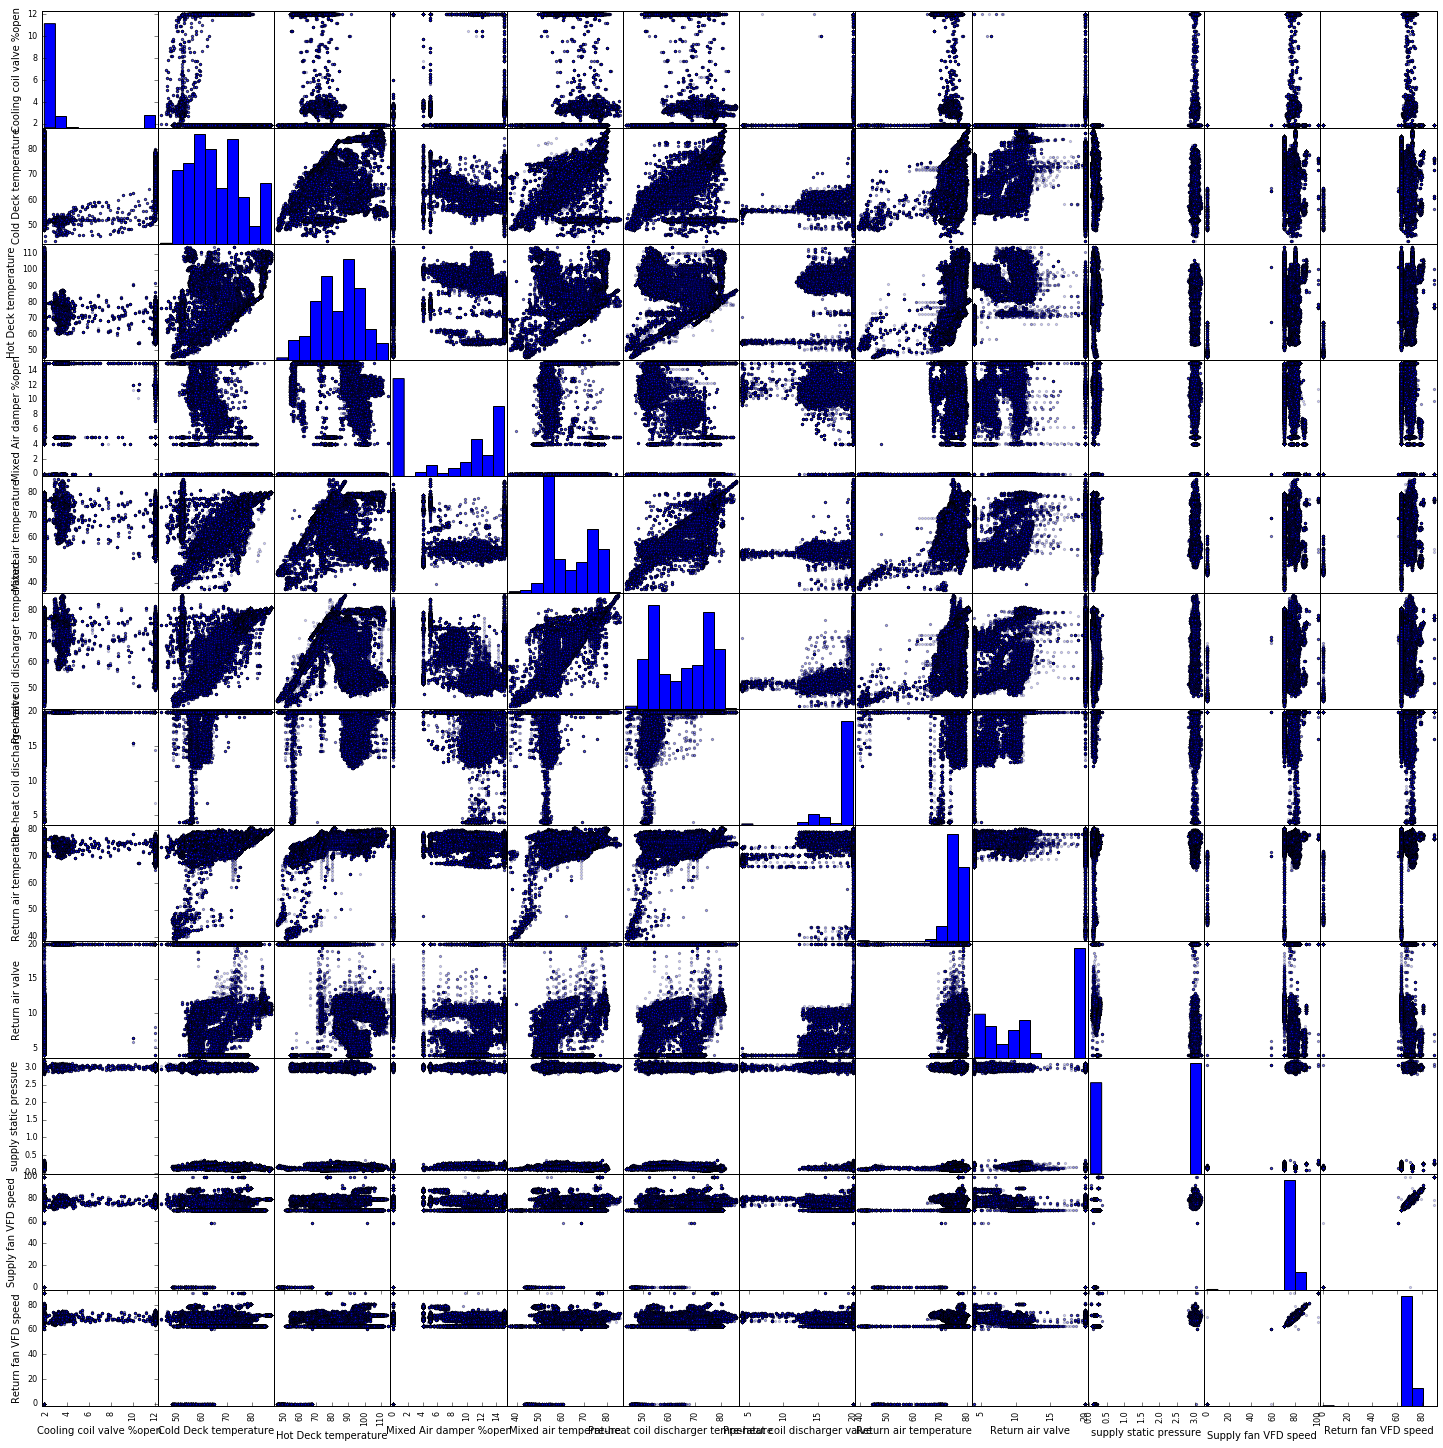

In [13]:
df = pd.scatter_matrix(df1, alpha = 0.2, figsize=(25,25))
plt.savefig(''.join(['bivariate','_ahu_18']))

In [164]:
work = pd.read_excel('C:/Users/MisraSN-PC/Desktop/CSP 572 - Practicum/datasets/work order/keyword_it.xlsx',sheetname = 'TOO COLD')
wo = work[work['Floor']==18]
wo.head()

,Wo Number,Description,Assigned To,Building,Floor,Room,Craft,Enter Date,Wo Close Date,Hours SUM
750,WO122352,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18C9-1,HVAC,2015-01-13 09:48:35,2015-01-14 14:37:09,1.00
924,WO122529,ROOM IS TOO COLD,TARIANOU,IT,18.0,18F4-1,HVAC,2015-01-16 10:54:44,2015-01-16 15:32:41,0.75
4579,WO126183,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18E4-1,HVAC,2015-04-02 11:37:40,2015-04-03 14:30:12,2.00
4600,WO126205,ROOM IS TOO COLD - 18E4-1,DBROOKS4,IT,18.0,18E4-1,HVAC,2015-04-02 15:00:17,2015-04-03 13:33:07,0.50
4718,WO126322,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18E4-1,HVAC,2015-04-06 09:49:47,2015-04-08 15:01:49,0.50


In [163]:
s = pd.DatetimeIndex(wo['Wo Close Date'])
wo['Date'] = s.date
wo['Time'] = s.time
wo.head()

C:\Users\MisraSN-PC\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\MisraSN-PC\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Wo Number,Description,Assigned To,Building,Floor,Room,Craft,Enter Date,Wo Close Date,Hours SUM,Date,Time
750,WO122352,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18C9-1,HVAC,2015-01-13 09:48:35,2015-01-14 14:37:09,1.00,2015-01-14,14:37:09
924,WO122529,ROOM IS TOO COLD,TARIANOU,IT,18.0,18F4-1,HVAC,2015-01-16 10:54:44,2015-01-16 15:32:41,0.75,2015-01-16,15:32:41
4579,WO126183,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18E4-1,HVAC,2015-04-02 11:37:40,2015-04-03 14:30:12,2.00,2015-04-03,14:30:12
4600,WO126205,ROOM IS TOO COLD - 18E4-1,DBROOKS4,IT,18.0,18E4-1,HVAC,2015-04-02 15:00:17,2015-04-03 13:33:07,0.50,2015-04-03,13:33:07
4718,WO126322,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18E4-1,HVAC,2015-04-06 09:49:47,2015-04-08 15:01:49,0.50,2015-04-08,15:01:49


In [159]:
import datetime
ahu18['Date'] = pd.DatetimeIndex(ahu18['Date'])
wo_3 = ahu18[(ahu18['Date']<='2016-04-27')& (ahu18['Date']>='2016-04-20')]
wo_2 = ahu18[(ahu18['Date']<='2016-02-16')& (ahu18['Date']>='2016-02-09')]
wo_1 = ahu18[(ahu18['Date']<='2016-01-22')& (ahu18['Date']>='2016-01-15')]
wo_1.head()

,Date,Time,Supply fan ON?OFF,Cooling coil valve %open,Cold Deck temperature,exhaust fans ON?OFF,Hot Deck temperature,Mixed Air damper %open,Mixed air temperature,Pre-heat coil discharger temperature,Pre-heat coil discharger valve,Return air temperature,Return air valve,supply static pressure,Supply fan VFD speed,Return fan VFD speed,datetime,Q
18034,2016-01-15,00:00:00,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:00:00,0.026605
18035,2016-01-15,00:01:57,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:01:57,0.026605
18036,2016-01-15,00:02:36,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:02:36,0.026605
18037,2016-01-15,00:02:52,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:02:52,0.026605
18038,2016-01-15,00:03:21,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:03:21,0.026605


In [154]:
ahu18['datetime'] = pd.to_datetime(ahu18['Date'])+pd.to_timedelta(ahu18['Time'])
ahu18['Q'] = ahu18['Supply fan VFD speed']*(abs(ahu18['Pre-heat coil discharger temperature']-ahu18['Mixed air temperature']))

In [156]:
#normalise Q
ahu18['Q'] = ahu18['Q']/(max(ahu18['Q']))
ahu18.head()

,Date,Time,Supply fan ON?OFF,Cooling coil valve %open,Cold Deck temperature,exhaust fans ON?OFF,Hot Deck temperature,Mixed Air damper %open,Mixed air temperature,Pre-heat coil discharger temperature,Pre-heat coil discharger valve,Return air temperature,Return air valve,supply static pressure,Supply fan VFD speed,Return fan VFD speed,datetime,Q
0,2015-12-31,00:00:00,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20.0,0.09,70.0,63.0,2015-12-31 00:00:00,0.06799
1,2015-12-31,00:02:42,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20.0,0.09,70.0,63.0,2015-12-31 00:02:42,0.06799
2,2015-12-31,00:03:20,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20.0,0.09,70.0,63.0,2015-12-31 00:03:20,0.06799
3,2015-12-31,00:03:36,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20.0,0.09,70.0,63.0,2015-12-31 00:03:36,0.06799
4,2015-12-31,00:04:05,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20.0,0.09,70.0,63.0,2015-12-31 00:04:05,0.06799


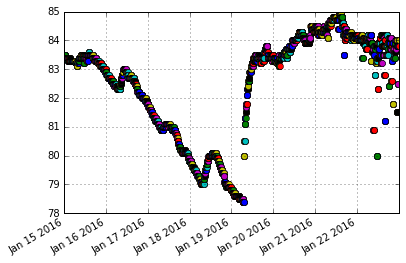

In [113]:
import plotly.plotly as py
import plotly.graph_objs as go
date = [wo_1['datetime']]
y = [wo_1['Cold Deck temperature']]
fig = plt.figure()
plt.plot_date(date,y)
plt.grid(True)
plt.gcf().autofmt_xdate()
#plt.plot_date(dates, [ahu18['Cooling coil valve %open']])
plt.show()

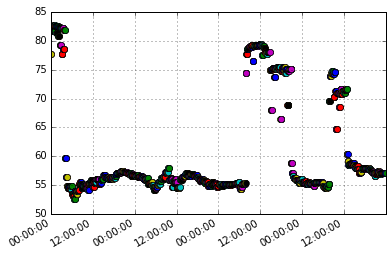

In [111]:
date = [wo_2['datetime']]
y = [wo_2['Cold Deck temperature']]
fig = plt.figure()
plt.plot_date(date,y)
plt.grid(True)
plt.gcf().autofmt_xdate()
#plt.plot_date(dates, [ahu18['Cooling coil valve %open']])
plt.show()

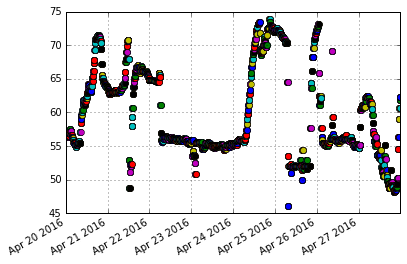

In [114]:
date = [wo_3['datetime']]
y = [wo_3['Cold Deck temperature']]
fig = plt.figure()
plt.plot_date(date,y)
plt.grid(True)
plt.gcf().autofmt_xdate()
#plt.plot_date(dates, [ahu18['Cooling coil valve %open']])
plt.show()

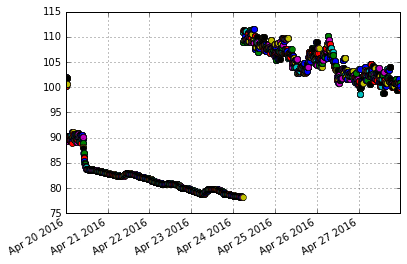

In [117]:
y1= [wo_1['Hot Deck temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

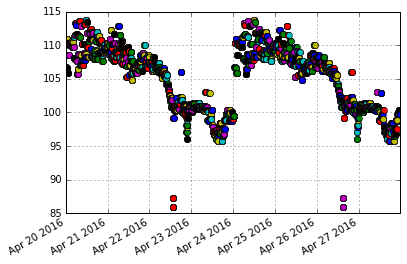

In [118]:
y1= [wo_2['Hot Deck temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

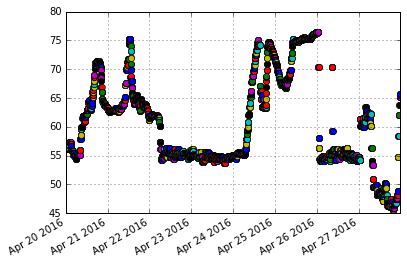

In [119]:
y1= [wo_3['Hot Deck temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

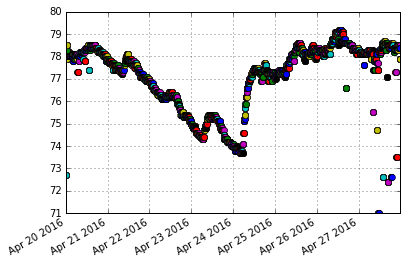

In [120]:
y1= [wo_1['Mixed air temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

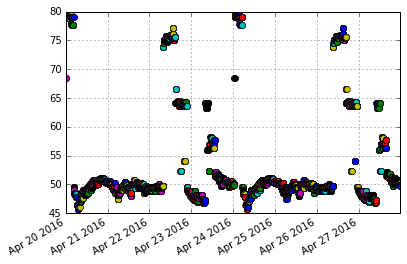

In [121]:
y1= [wo_2['Mixed air temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

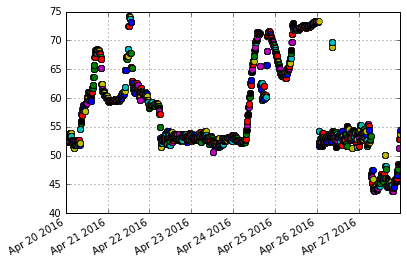

In [122]:
y1= [wo_3['Mixed air temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

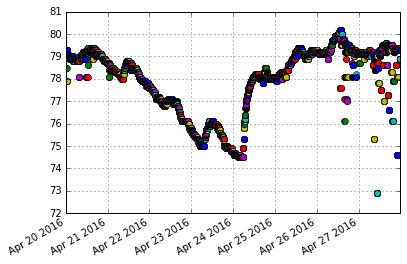

In [123]:
y1= [wo_1['Pre-heat coil discharger temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

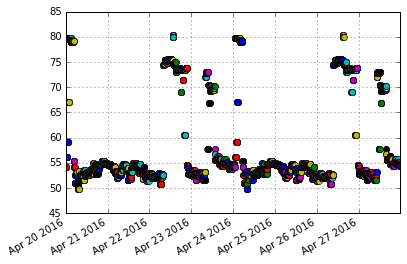

In [124]:
y1= [wo_2['Pre-heat coil discharger temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

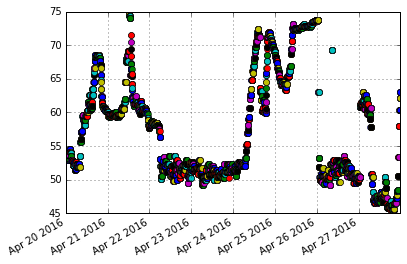

In [125]:
y1= [wo_3['Pre-heat coil discharger temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

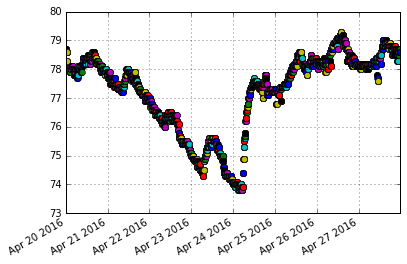

In [126]:
y1= [wo_1['Return air temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

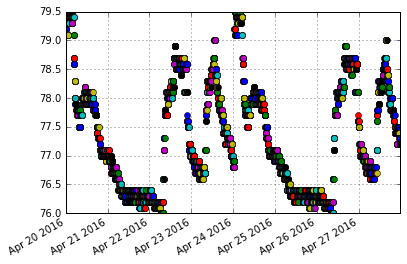

In [127]:
y1= [wo_2['Return air temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

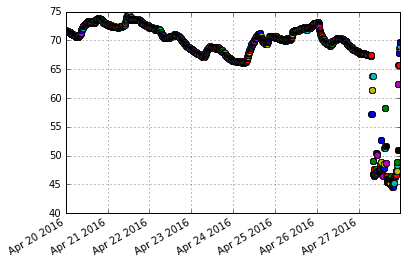

In [128]:
y1= [wo_3['Return air temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

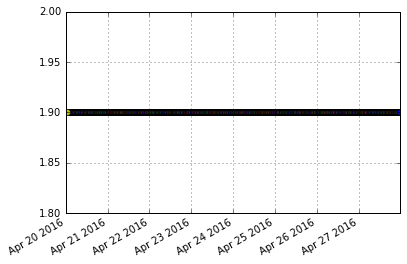

In [129]:
y1= [wo_1['Cooling coil valve %open']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

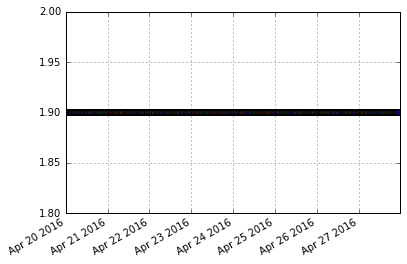

In [130]:
y1= [wo_2['Cooling coil valve %open']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

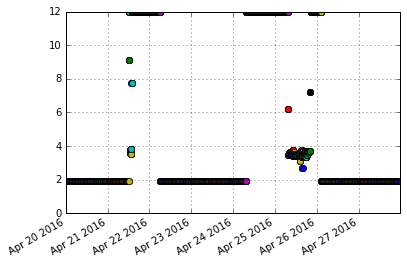

In [131]:
y1= [wo_3['Cooling coil valve %open']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

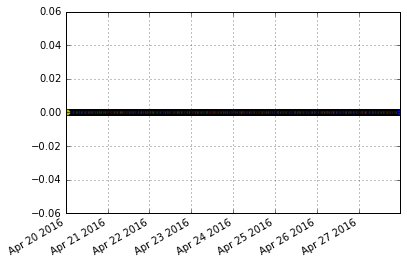

In [134]:
y1= [wo_1['Mixed Air damper %open']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

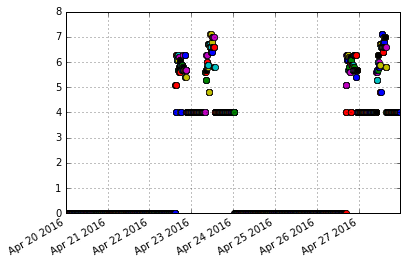

In [135]:
y1= [wo_2['Mixed Air damper %open']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

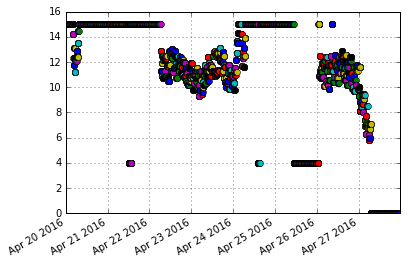

In [136]:
y1= [wo_3['Mixed Air damper %open']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

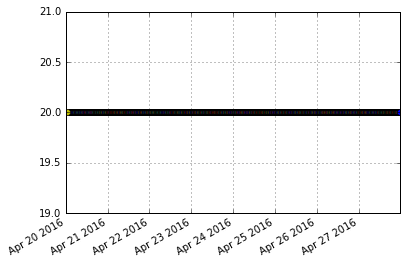

In [138]:
y1= [wo_1['Pre-heat coil discharger valve']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

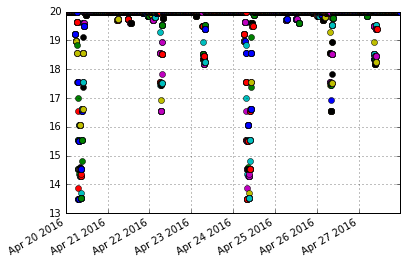

In [139]:
y1= [wo_2['Pre-heat coil discharger valve']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

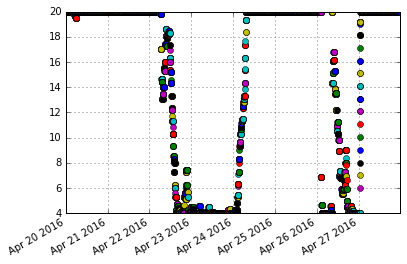

In [140]:
y1= [wo_3['Pre-heat coil discharger valve']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

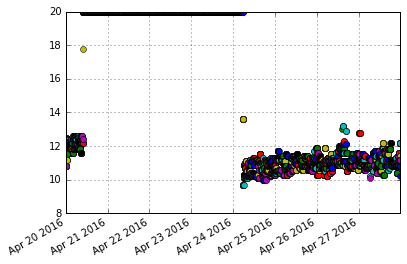

In [142]:
y1= [wo_1['Return air valve']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

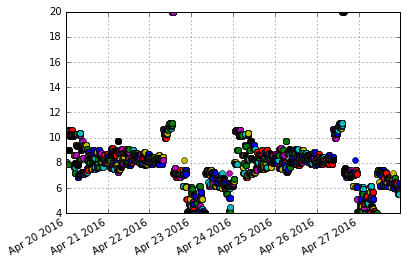

In [143]:
y1= [wo_2['Return air valve']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

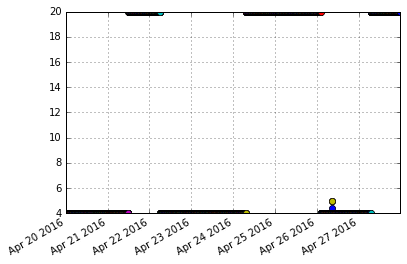

In [144]:
y1= [wo_3['Return air valve']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

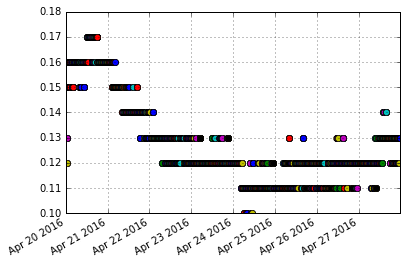

In [145]:
y1= [wo_1['supply static pressure']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

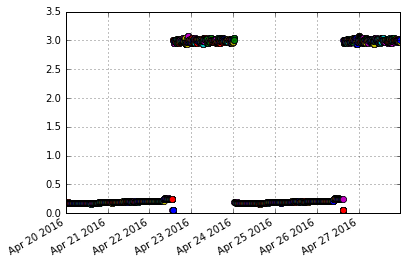

In [146]:
y1= [wo_2['supply static pressure']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

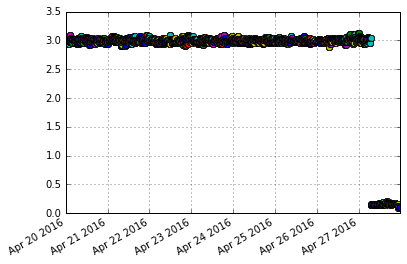

In [147]:
y1= [wo_3['supply static pressure']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

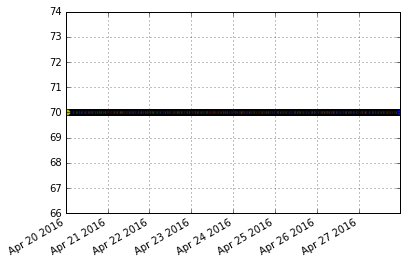

In [148]:
y1= [wo_1['Supply fan VFD speed']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

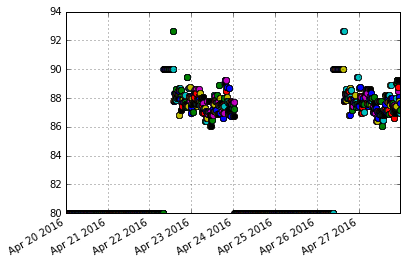

In [149]:
y1= [wo_2['Supply fan VFD speed']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

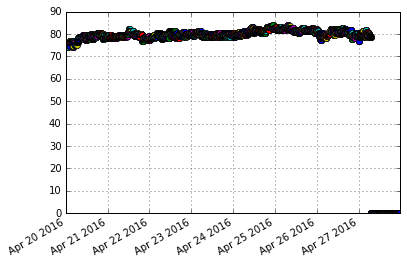

In [150]:
y1= [wo_3['Supply fan VFD speed']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

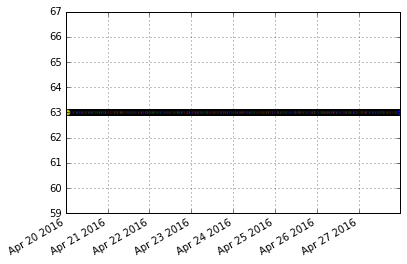

In [151]:
y1= [wo_1['Return fan VFD speed']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

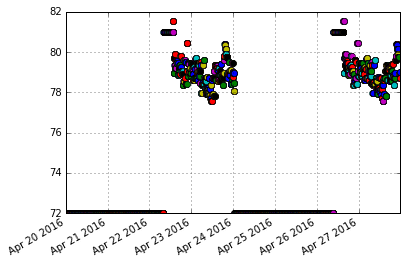

In [152]:
y1= [wo_2['Return fan VFD speed']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

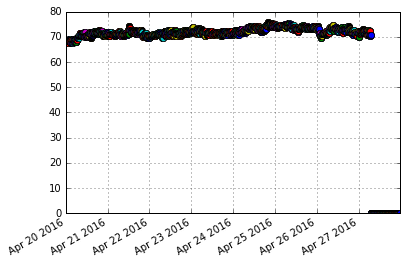

In [153]:
y1= [wo_3['Return fan VFD speed']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

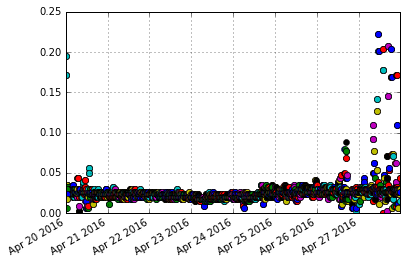

In [160]:
y1= [wo_1['Q']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

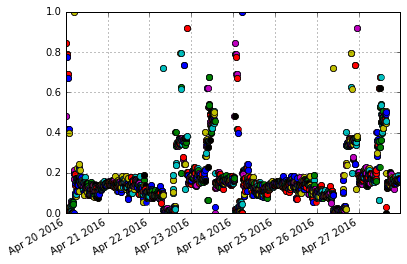

In [161]:
y1= [wo_2['Q']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

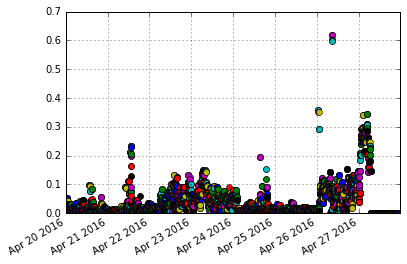

In [162]:
y1= [wo_3['Q']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()